<a href="https://colab.research.google.com/github/laurenskie/Fall_23_Intro-To-Python-/blob/main/Copy2_of_Final__Python_F23_Capstone_NY_Suicide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://health.data.ny.gov/Health/Vital-Statistics-Suicide-Deaths-by-Age-Group-Race-/j6fz-a4ta/about_data

Vital Statistics Suicide Deaths by Age-Group, Race/Ethnicity, Resident Region, and Gender: Beginning 2003
Health


This dataset contains suicide death counts by region, race or ethnicity, sex, and age group.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#df = pd.read_csv('https://query.data.world/s/ciakh3dsx6z3hmzat77iplngff3k4d?dws=00000')

#uri = 'https://health.data.ny.gov/resource/j6fz-a4ta.csv'
df=pd.read_csv('Vital_Statistics_Suicide_Deaths_by.csv')
#df = pd.read_csv(uri)
df.head()

,Year,Region,Race or Ethnicity,Sex,Age Group,Firearm Deaths,Alcohol-Related Deaths,Suicide Deaths
0,2003,NYC,Black Non Hispanic,F,1-9,0,0,0
1,2003,NYC,Black Non Hispanic,M,1-9,0,0,0
2,2003,NYC,Black Non Hispanic,F,10-19,0,1,2
3,2003,NYC,Black Non Hispanic,M,10-19,7,0,6
4,2003,NYC,Black Non Hispanic,F,20-24,0,0,1


In [3]:
df['Age Group'].value_counts()

45-54      360
55-64      360
65-74      360
75-84      360
85+        360
<1         360
Total      360
25-34      359
35-44      359
10-19      353
20-24      350
1-9        342
Unknown     13
Name: Age Group, dtype: int64

In [4]:
#Check to see what type of data we are working with.  I am looking at objects:  gender, age,  Integers: num_lab_procedures, time_in_hospital
df.dtypes

Year                       int64
Region                    object
Race or Ethnicity         object
Sex                       object
Age Group                 object
Firearm Deaths             int64
Alcohol-Related Deaths     int64
Suicide Deaths             int64
dtype: object

In [5]:
#count the number of lines in the data set
num_lines= len(df)
print("There are",num_lines, 'in this dataset.')

There are 4296 in this dataset.


In [6]:
#Number of Rows and Colums;   shape
rows = df.shape[0]
columns = df.shape[1]
print("There are", rows, "rows and ", columns, "columns in this data set.")

There are 4296 rows and  8 columns in this data set.


In [7]:
#What are the names of the columns?
list(df.columns)

['Year',
 'Region',
 'Race or Ethnicity',
 'Sex',
 'Age Group',
 'Firearm Deaths',
 'Alcohol-Related Deaths',
 'Suicide Deaths']

Explore the discrete data types;I want to look specifically at the region, race, ethnicity, sex and age group.

Region

NYC= New York City
ROS = Rest of State

In [8]:
region= df.Region
region.value_counts()


NYC    2155
ROS    2141
Name: Region, dtype: int64

Race or Ethnicity?

In [9]:
race_ethnicity=df['Race or Ethnicity']
race_ethnicity.value_counts()

White Non Hispanic    869
Hispanic              866
Black Non Hispanic    864
Other Non Hispanic    864
Not Stated            833
Name: Race or Ethnicity, dtype: int64

Age Group

In [10]:
age_group=df['Age Group']
age_group.value_counts()

45-54      360
55-64      360
65-74      360
75-84      360
85+        360
<1         360
Total      360
25-34      359
35-44      359
10-19      353
20-24      350
1-9        342
Unknown     13
Name: Age Group, dtype: int64

In [11]:
df.describe()



,Year,Firearm Deaths,Alcohol-Related Deaths,Suicide Deaths
count,4296.000000,4296.000000,4296.000000,4296.000000
mean,2011.537244,6.449721,36.615456,12.781192
std,5.205487,28.324805,124.182607,52.980125
min,2003.000000,0.000000,0.000000,0.000000
25%,2007.000000,0.000000,0.000000,0.000000
50%,2012.000000,0.000000,3.000000,2.000000
75%,2016.000000,2.000000,21.000000,7.000000
max,2020.000000,427.000000,2116.000000,810.000000


In [12]:
#look to see if there is any missing data, Nothing is missing;
df.isnull().sum()

Year                      0
Region                    0
Race or Ethnicity         0
Sex                       0
Age Group                 0
Firearm Deaths            0
Alcohol-Related Deaths    0
Suicide Deaths            0
dtype: int64

In [13]:
#clean data
print(f'original shape of data {df.shape}' )
df=df.drop_duplicates()
print(f'new shape of data {df.shape}' )
df.head()


original shape of data (4296, 8)
new shape of data (4296, 8)


,Year,Region,Race or Ethnicity,Sex,Age Group,Firearm Deaths,Alcohol-Related Deaths,Suicide Deaths
0,2003,NYC,Black Non Hispanic,F,1-9,0,0,0
1,2003,NYC,Black Non Hispanic,M,1-9,0,0,0
2,2003,NYC,Black Non Hispanic,F,10-19,0,1,2
3,2003,NYC,Black Non Hispanic,M,10-19,7,0,6
4,2003,NYC,Black Non Hispanic,F,20-24,0,0,1


Is there a correlation between "firearm Deatch' and 'Alcohol related Deathes'?

Dropping columns, "Firearm Deaths" and "Alcohol-Related Deaths", since I am focusing on suicide deaths.

In [14]:
df.drop(columns =['Firearm Deaths', 'Alcohol-Related Deaths'])

,Year,Region,Race or Ethnicity,Sex,Age Group,Suicide Deaths
0,2003,NYC,Black Non Hispanic,F,1-9,0
1,2003,NYC,Black Non Hispanic,M,1-9,0
2,2003,NYC,Black Non Hispanic,F,10-19,2
3,2003,NYC,Black Non Hispanic,M,10-19,6
4,2003,NYC,Black Non Hispanic,F,20-24,1
...,...,...,...,...,...,...
4291,2020,ROS,White Non Hispanic,M,<1,0
4292,2020,ROS,White Non Hispanic,F,Total,214
4293,2020,ROS,White Non Hispanic,M,Total,746
4294,2020,ROS,White Non Hispanic,F,Unknown,0


<Axes: xlabel='Year', ylabel='Suicide Deaths'>

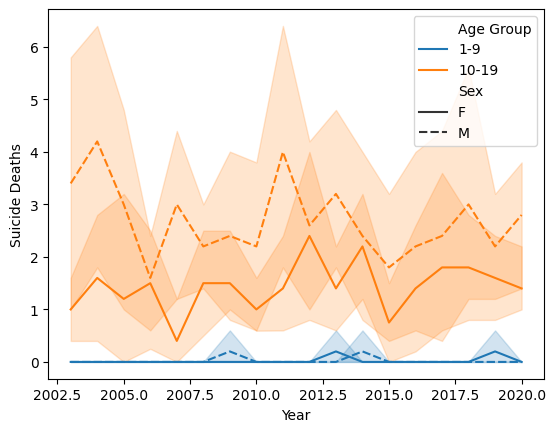

In [15]:
#df.query('"Age Group"  in ["1-9", "10-19"]')
keep =( df['Age Group'].isin(['1-9', '10-19']))& (df['Region']=='NYC')
child_df=df.loc[keep]
sns.lineplot(data=child_df,x='Year',y= "Suicide Deaths", hue='Age Group', style="Sex")


### What does the suicide look like for children in NYC and ROS?

In [16]:
### First we get subselect all children-teens in both regions.
child_rows = df['Age Group'].isin(['1-9','10-19'])
child_df = df.loc[child_rows]

### Now we aggregate by groupby , year and region, we are then summing all the numbers for boys and girls and all ethnicities
### The ['Suicide Deaths'] selects the column of interest and the .sum() sums that column after grouping
### reset index puts index into columns
child_suicide_per_year = (child_df.groupby(['Year', 'Region'])
                          ['Suicide Deaths'].sum()
                          .reset_index()
                          )

child_suicide_per_year.head()

,Year,Region,Suicide Deaths
0,2003,NYC,22
1,2003,ROS,42
2,2004,NYC,29
3,2004,ROS,54
4,2005,NYC,21


<Axes: xlabel='Year', ylabel='Suicide Deaths'>

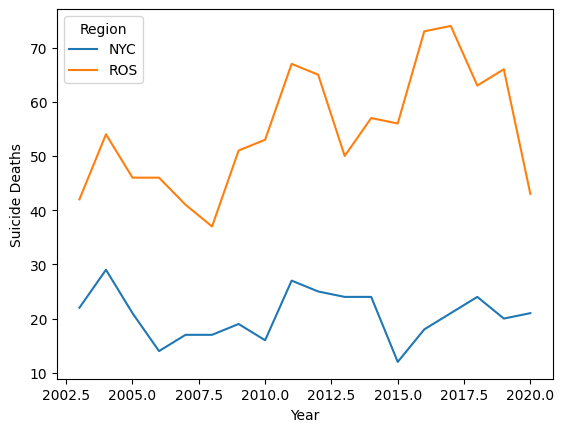

In [17]:
### Now lets plot this

sns.lineplot(data = child_suicide_per_year, x ='Year', y='Suicide Deaths', hue = 'Region')

### What does the suicide count per year look like for all people in ny by age group.

In [18]:
### First get ny data only via query
ny_df = df.query('Region =="NYC"')


### Now we aggregate by groupby , and age group,
### The ['Suicide Deaths'] selects the column of interest and the .sum() sums that column after grouping
### reset index puts index into columns
nyc_suicide_per_year_by_age = (ny_df.groupby(['Year', 'Age Group'])
                               ['Suicide Deaths'].sum()
                               .reset_index()
                               )
nyc_suicide_per_year_by_age = nyc_suicide_per_year_by_age.loc[nyc_suicide_per_year_by_age['Age Group']!='Total']

nyc_suicide_per_year_by_age.head()

,Year,Age Group,Suicide Deaths
0,2003,1-9,0
1,2003,10-19,22
2,2003,20-24,30
3,2003,25-34,75
4,2003,35-44,87


<Axes: xlabel='Year', ylabel='Suicide Deaths'>

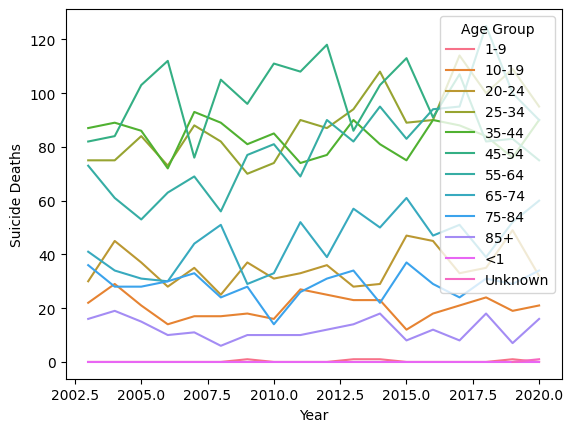

In [19]:
sns.lineplot(data = nyc_suicide_per_year_by_age, x ='Year', y='Suicide Deaths', hue = 'Age Group')

In [20]:
ros_df = df.query('Region =="ROS"')


### Now we aggregate by groupby , and age group,
### The ['Suicide Deaths'] selects the column of interest and the .sum() sums that column after grouping
### reset index puts index into columns
ros_suicide_per_year_by_age = (ros_df.groupby(['Year', 'Age Group'])
                               ['Suicide Deaths'].sum()
                               .reset_index()
                               )
ros_suicide_per_year_by_age = ros_suicide_per_year_by_age.loc[ros_suicide_per_year_by_age['Age Group']!='Total']

ros_suicide_per_year_by_age.head()

,Year,Age Group,Suicide Deaths
0,2003,1-9,0
1,2003,10-19,42
2,2003,20-24,72
3,2003,25-34,109
4,2003,35-44,157


<Axes: xlabel='Year', ylabel='Suicide Deaths'>

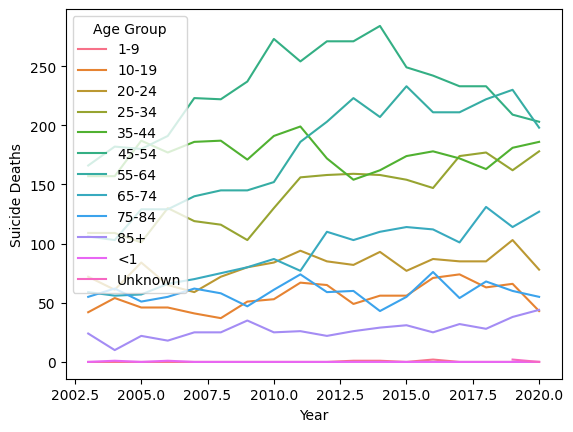

In [21]:
sns.lineplot(data = ros_suicide_per_year_by_age, x ='Year', y='Suicide Deaths', hue = 'Age Group')

In [22]:
### First we get subselect all children-teens in both regions.
child_rows = df['Age Group'].isin(['1-9','10-19'])
child_df = df.loc[child_rows]

### Now we aggregate by groupby , year and region, we are then summing all the numbers for boys and girls and all ethnicities
### The ['Suicide Deaths'] selects the column of interest and the .sum() sums that column after grouping
### reset index puts index into columns
child_suicide_per_year = (child_df.groupby(['Year', 'Region', 'Sex', 'Age Group'])
                          ['Suicide Deaths'].sum()
                          .reset_index()
                          )

child_suicide_per_year.head()

,Year,Region,Sex,Age Group,Suicide Deaths
0,2003,NYC,F,1-9,0
1,2003,NYC,F,10-19,5
2,2003,NYC,M,1-9,0
3,2003,NYC,M,10-19,17
4,2003,ROS,F,1-9,0


<Axes: xlabel='Year', ylabel='Suicide Deaths'>

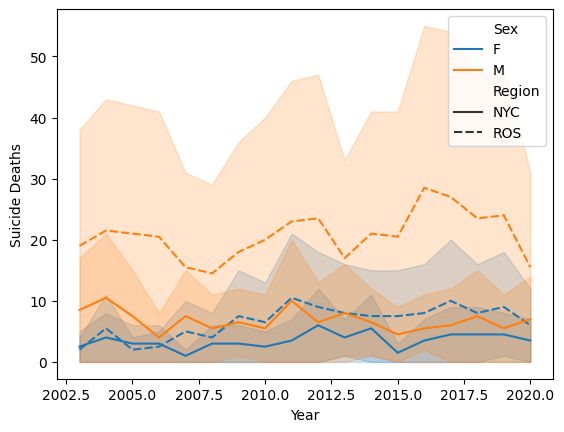

In [23]:
### Now lets plot this

sns.lineplot(data = child_suicide_per_year, x ='Year', y='Suicide Deaths', hue = 'Sex', style='Region')
#sns.lineplot(data = child_suicide_per_year, x ='Year', y='Suicide Deaths', hue = 'Age Group')

<Axes: xlabel='Year', ylabel='Suicide Deaths'>

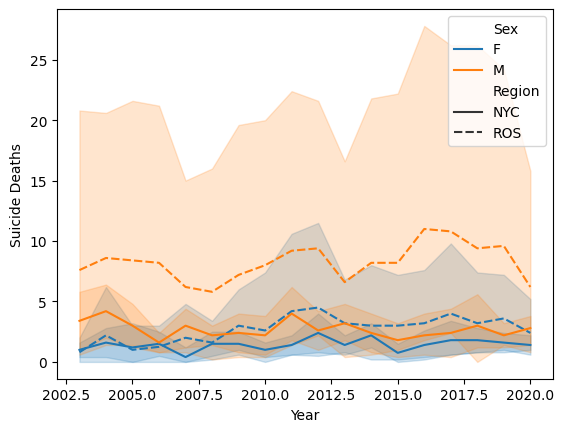

In [24]:
#adolecent = ad
ad_rows = df['Age Group'].isin(['10-19'])
ad_df = df.loc[ad_rows]
#df.query1('"Age Group"  in ["10-19"]')
#keep_ad =( df['Age Group'].isin(['10-19']))& (df['Region']=='NYC')
keep_ad =( df['Age Group'].isin(['10-19']))& (df['Region'])
ad_df=df.loc[keep_ad]
sns.lineplot(data=ad_df,x='Year',y= "Suicide Deaths", hue='Sex', style="Region")


<Axes: xlabel='Year', ylabel='Suicide Deaths'>

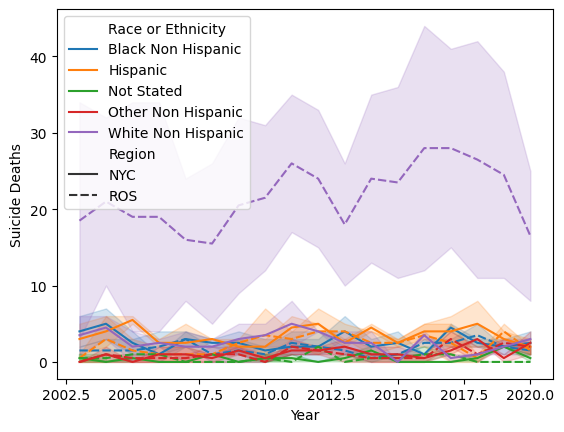

In [25]:
#Is there a difference in suicide rates for different races and ethnicities?
#adolecent = ad
ad_rows = df['Age Group'].isin(['10-19'])
ad_df = df.loc[ad_rows]
#df.query1('"Age Group"  in ["10-19"]')
#keep_ad =( df['Age Group'].isin(['10-19']))& (df['Region']=='NYC')
keep_ad =( df['Age Group'].isin(['10-19']))& (df['Region']) & (df['Race or Ethnicity']) & (df['Sex'])
ad_df=df.loc[keep_ad]
sns.lineplot(data=ad_df,x='Year',y= "Suicide Deaths", hue='Race or Ethnicity', style="Region")


<Axes: xlabel='Year', ylabel='Suicide Deaths'>

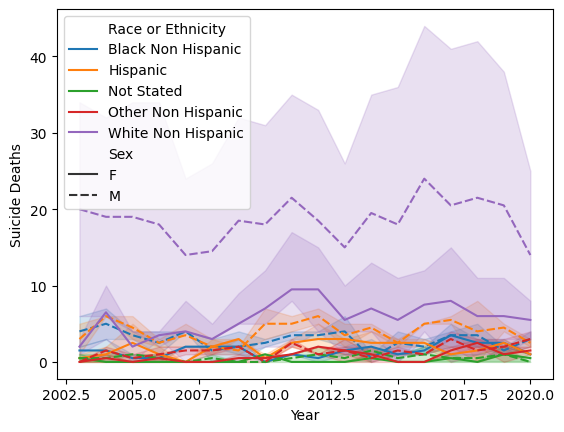

In [26]:
ad_rows = df['Age Group'].isin(['10-19'])
ad_df = df.loc[ad_rows]
#df.query1('"Age Group"  in ["10-19"]')
#keep_ad =( df['Age Group'].isin(['10-19']))& (df['Region']=='NYC')
keep_ad =( df['Age Group'].isin(['10-19']))& (df['Region']) & (df['Race or Ethnicity']) & (df['Sex'])
ad_df=df.loc[keep_ad]
sns.lineplot(data=ad_df,x='Year',y= "Suicide Deaths", hue='Race or Ethnicity', style="Sex")


In [27]:
female_df = df.query('Sex =="F"')


### Now we aggregate by groupby , and age group,
### The ['Suicide Deaths'] selects the column of interest and the .sum() sums that column after grouping
### reset index puts index into columns
female_suicide_per_year_by_age = (female_df.groupby(['Region','Year', 'Sex', 'Age Group'])
                               ['Suicide Deaths'].sum()
                               .reset_index()
                               )
female_suicide_per_year_by_age = female_suicide_per_year_by_age.loc[female_suicide_per_year_by_age['Sex']!='Total']

female_suicide_per_year_by_age.head()

,Region,Year,Sex,Age Group,Suicide Deaths
0,NYC,2003,F,1-9,0
1,NYC,2003,F,10-19,5
2,NYC,2003,F,20-24,6
3,NYC,2003,F,25-34,19
4,NYC,2003,F,35-44,26


<Axes: xlabel='Year', ylabel='Suicide Deaths'>

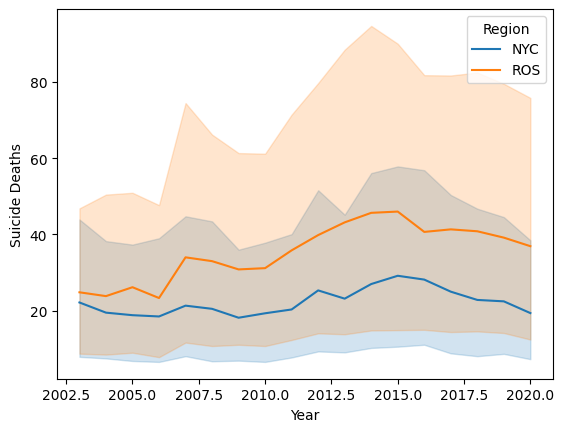

In [28]:
sns.lineplot(data = female_suicide_per_year_by_age, x ='Year', y='Suicide Deaths', hue = 'Region')

In [29]:
male_df = df.query('Sex =="M"')


### Now we aggregate by groupby , and age group,
### The ['Suicide Deaths'] selects the column of interest and the .sum() sums that column after grouping
### reset index puts index into columns
male_suicide_per_year_by_age = (male_df.groupby(['Region','Year', 'Sex', 'Age Group'])
                               ['Suicide Deaths'].sum()
                               .reset_index()
                               )
male_suicide_per_year_by_age = male_suicide_per_year_by_age.loc[male_suicide_per_year_by_age['Sex']!='Total']

male_suicide_per_year_by_age.head()

,Region,Year,Sex,Age Group,Suicide Deaths
0,NYC,2003,M,1-9,0
1,NYC,2003,M,10-19,17
2,NYC,2003,M,20-24,24
3,NYC,2003,M,25-34,56
4,NYC,2003,M,35-44,61


<Axes: xlabel='Year', ylabel='Suicide Deaths'>

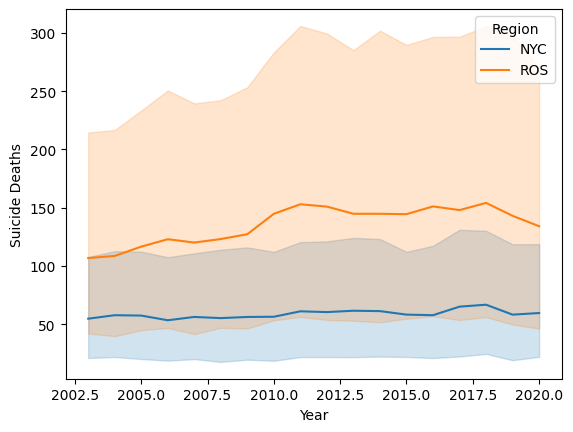

In [30]:
sns.lineplot(data = male_suicide_per_year_by_age, x ='Year', y='Suicide Deaths', hue = 'Region')

Is there a difference in ethnicity_race and suicides?